In [1]:
import pandas as pd


In [4]:
df = pd.read_csv('iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
111,6.4,2.7,5.3,1.9,virginica
41,4.5,2.3,1.3,0.3,setosa
70,5.9,3.2,4.8,1.8,versicolor
74,6.4,2.9,4.3,1.3,versicolor
84,5.4,3.0,4.5,1.5,versicolor
72,6.3,2.5,4.9,1.5,versicolor
7,5.0,3.4,1.5,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
134,6.1,2.6,5.6,1.4,virginica


In [8]:
df.drop(['sepal_length', 'sepal_width'], axis=1, inplace=True)

In [9]:
df.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [10]:
df.drop(['petal_width'], axis=1, inplace=True)


In [11]:
df.head()

,petal_length,species
0,1.4,setosa
1,1.4,setosa
2,1.3,setosa
3,1.5,setosa
4,1.4,setosa


# **Assignment # 02**

# ***Dataset Import and Exploration***

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [42]:
# Load dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
# description
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
# features
df.dtypes

Survived        int64
Pclass          int64
Gender          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_Q       bool
Embarked_S       bool
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Preprocessed Data**

In [46]:
# Dropping irrelevant columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  

# Encoding categorical data
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # One-hot encoding for Embarked


C:\Users\junai\AppData\Local\Temp\ipykernel_17108\2817227501.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\junai\AppData\Local\Temp\ipykernel_17108\2817227501.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

# ***Data Splitting***

In [47]:
# Features and target variable
x = df.drop('Survived', axis=1)
y = df['Survived']

# Splitting the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# ***Naïve Bayesian Implementation***

In [53]:
# Initialize the Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(x_train, y_train)

# Predict the test data
y_pred = gnb.predict(x_test)

In [54]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Naive Bayes classifier: {accuracy * 100:.2f}%')

Accuracy of the Naive Bayes classifier: 77.09%


# **22/10/2024**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# 1. Load the Iris dataset into a Pandas DataFrame.
df = pd.read_csv('iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
# 2. Perform univariate analysis on all numeric columns (sepal length, sepal width, petal length, petal width).
   # - Calculate summary statistics.

#print(df.describe())

for i in df.columns:
    if df[i].dtype == 'float64':
        print(f'{i}:')
        print(f'Median: {df[i].median()}')
        print(f'Mode: {df[i].mode()}')
        print(f'Variance: {df[i].var()}')
        print(f'Standard Deviation: {df[i].std()}')
        print(f'Mean: {df[i].mean()}')
        print(f'Range: {df[i].max() - df[i].min()}')
        print('\n')

sepal_length:
Median: 5.8
Mode: 0    5.0
Name: sepal_length, dtype: float64
Variance: 0.6856935123042507
Standard Deviation: 0.828066127977863
Mean: 5.843333333333334
Range: 3.6000000000000005


sepal_width:
Median: 3.0
Mode: 0    3.0
Name: sepal_width, dtype: float64
Variance: 0.1880040268456376
Standard Deviation: 0.4335943113621737
Mean: 3.0540000000000003
Range: 2.4000000000000004


petal_length:
Median: 4.35
Mode: 0    1.5
Name: petal_length, dtype: float64
Variance: 3.113179418344519
Standard Deviation: 1.7644204199522626
Mean: 3.758666666666666
Range: 5.9


petal_width:
Median: 1.3
Mode: 0    0.2
Name: petal_width, dtype: float64
Variance: 0.582414317673378
Standard Deviation: 0.7631607417008411
Mean: 1.1986666666666668
Range: 2.4




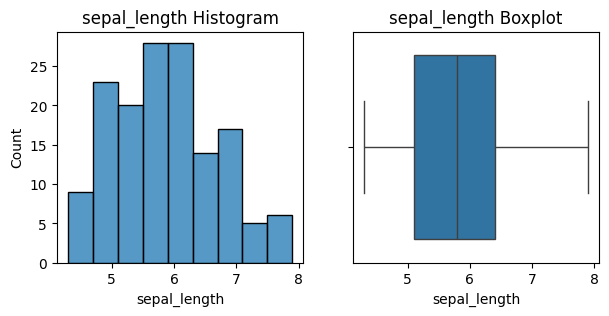

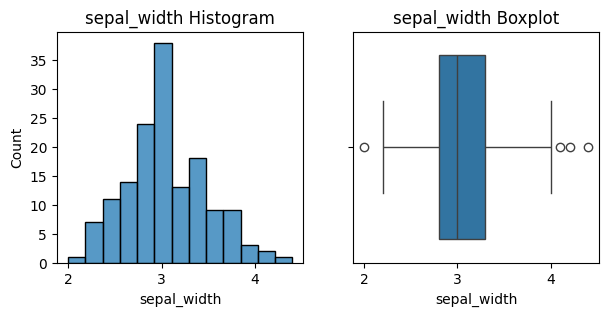

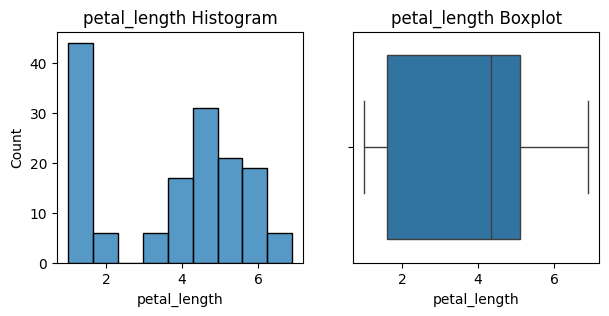

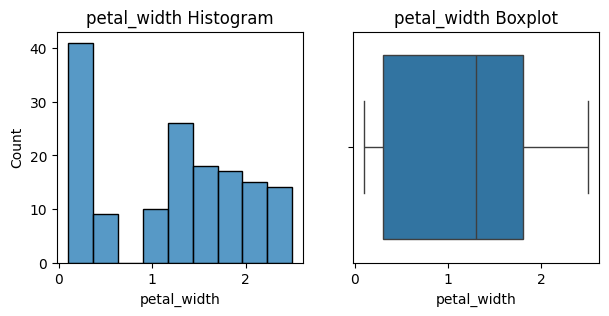

In [47]:
# - Create histograms and box plots for each variable.
for i in df.columns:
    if df[i].dtype == 'float64':
        plt.figure(figsize=(7, 3))
        plt.subplot(1, 2, 1)
        sns.histplot(df[i])
        plt.title(f'{i} Histogram')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[i])
        plt.title(f'{i} Boxplot')
        plt.show()


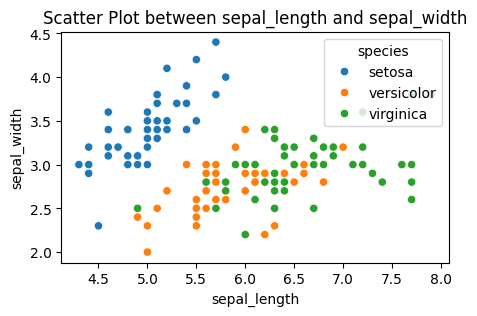

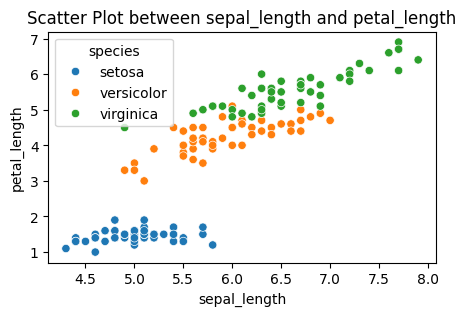

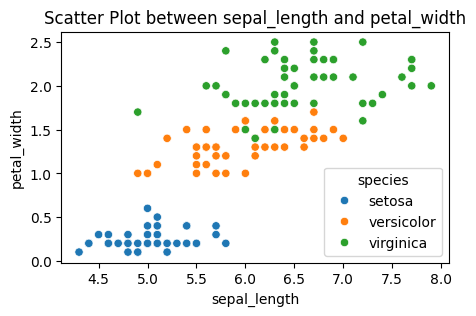

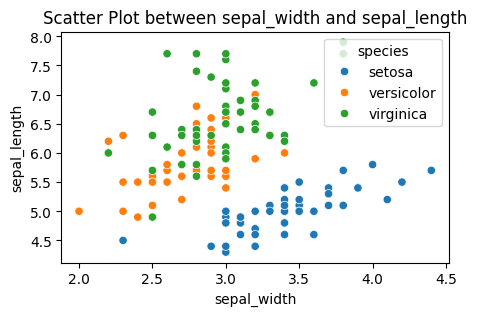

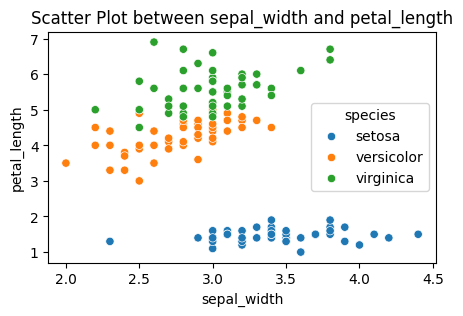

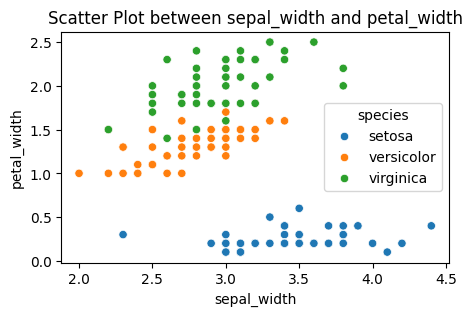

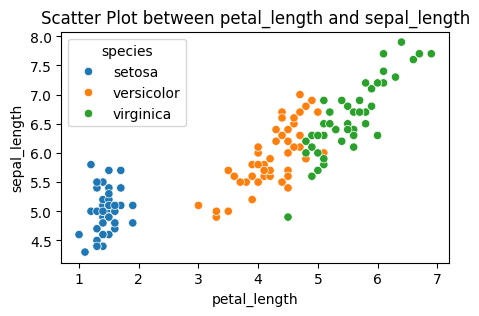

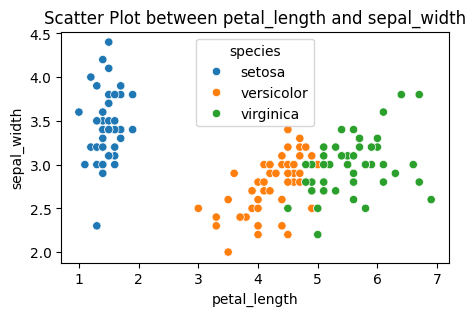

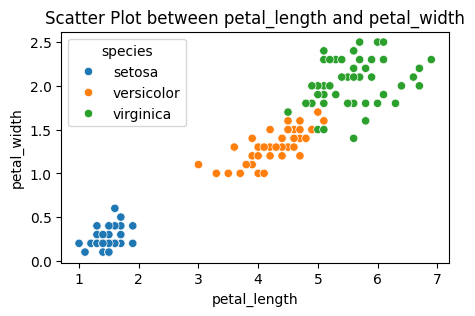

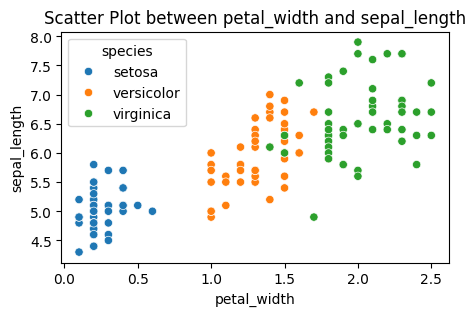

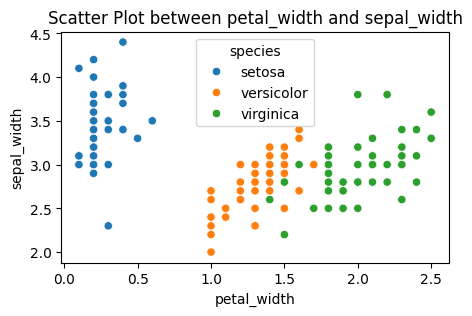

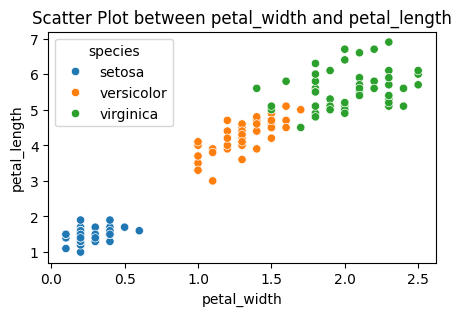

In [73]:
# 3. Perform bivariate analysis to explore relationships between pairs of variables.
 # - Create scatter plots for pairs of variables.
for i in df.columns:
    if df[i].dtype == 'float64':
        for j in df.columns:
            if df[j].dtype == 'float64' and i != j:
                plt.figure(figsize=(5, 3))
                sns.scatterplot(x=df[i], y=df[j], hue = df['species'])
                plt.title(f'Scatter Plot between {i} and {j}')
                plt.show()

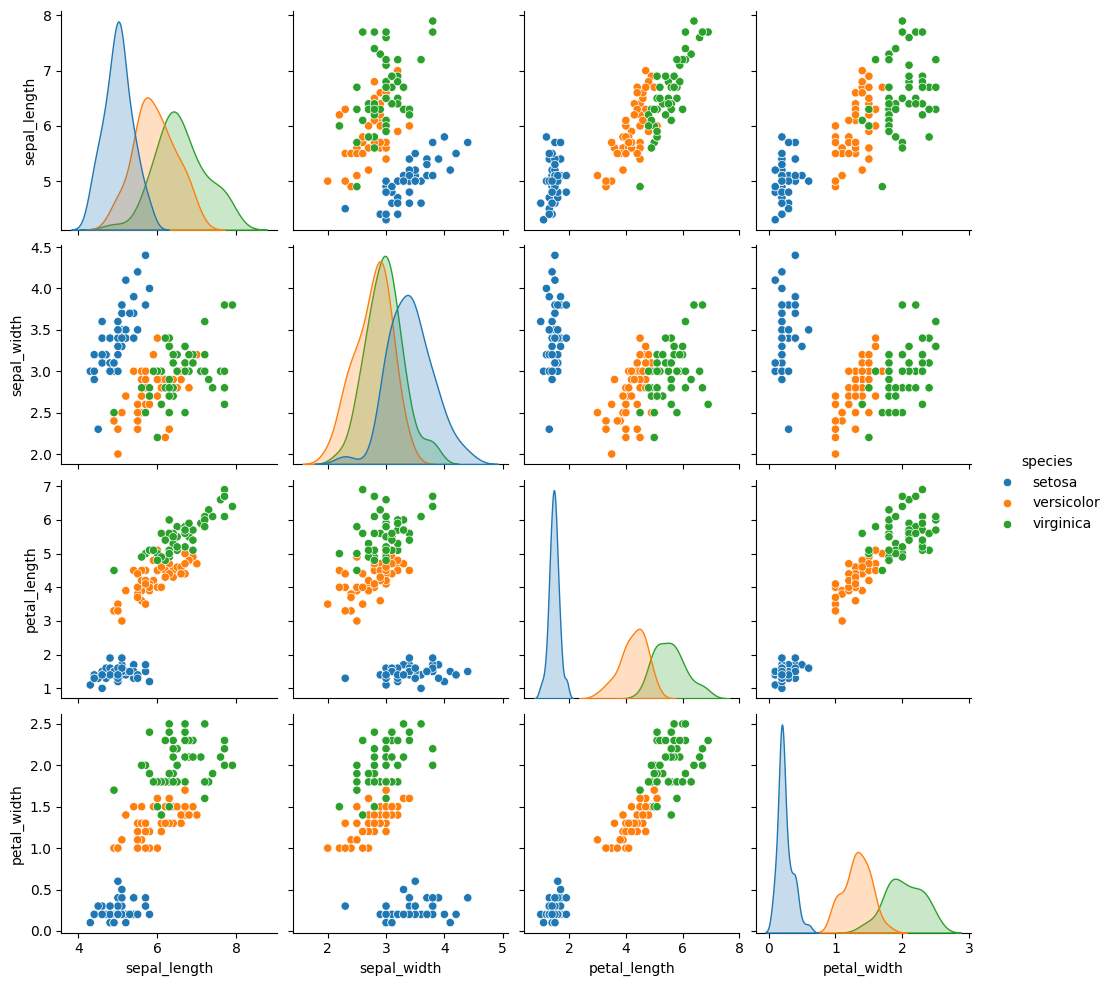

In [37]:
# - Create a pair plot to visualize relationships between all pairs of variables.

sns.pairplot(df, hue='species')
plt.show()


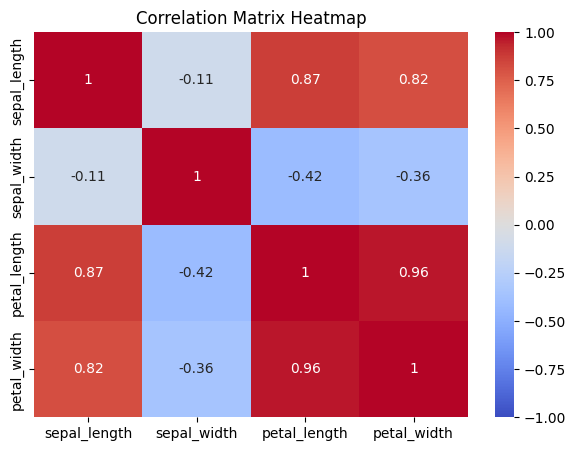

In [41]:
# - Calculate and visualize the correlation matrix.

df = df.drop(['species'], axis=1)

corr_matrix = df.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Exploring Various Types of Visual Representations in Python**

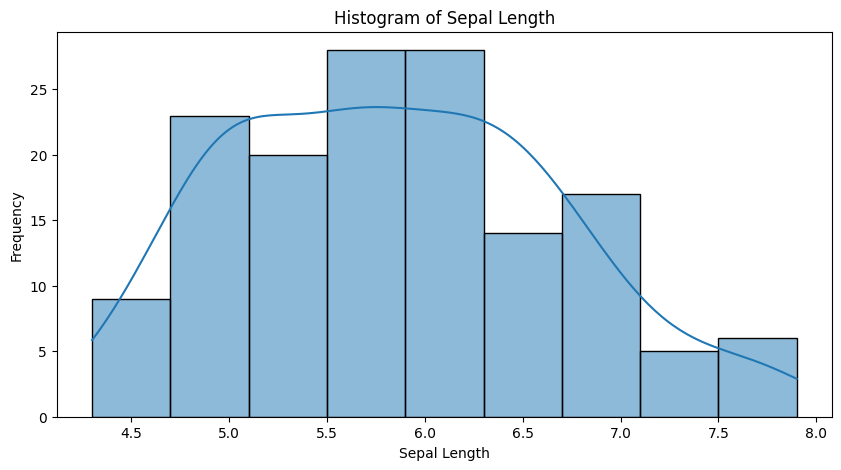

In [61]:
# Create each type of visualization (histogram, bar chart, line chart, bar and line chart, pie chart, heatmap, pair plot, box plot).
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['sepal_length'], kde=True)
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()


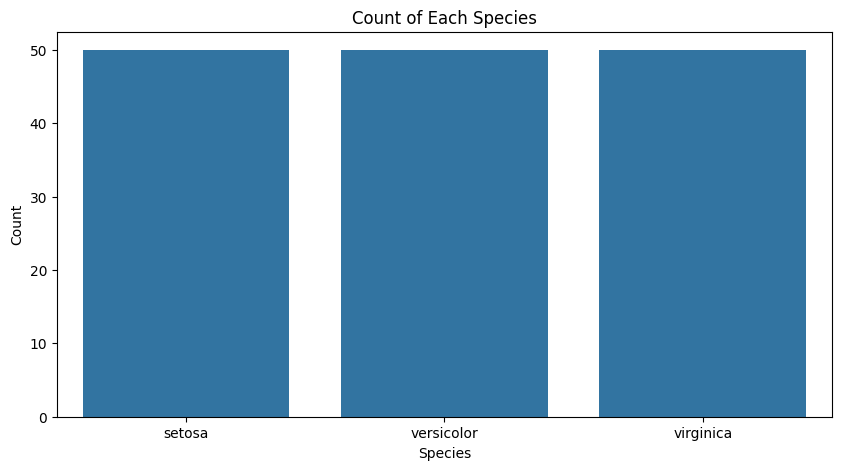

In [63]:
df = pd.read_csv('iris_data.csv')
# Bar Chart
plt.figure(figsize=(10, 5))
sns.countplot(x='species', data=df)
plt.title('Count of Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

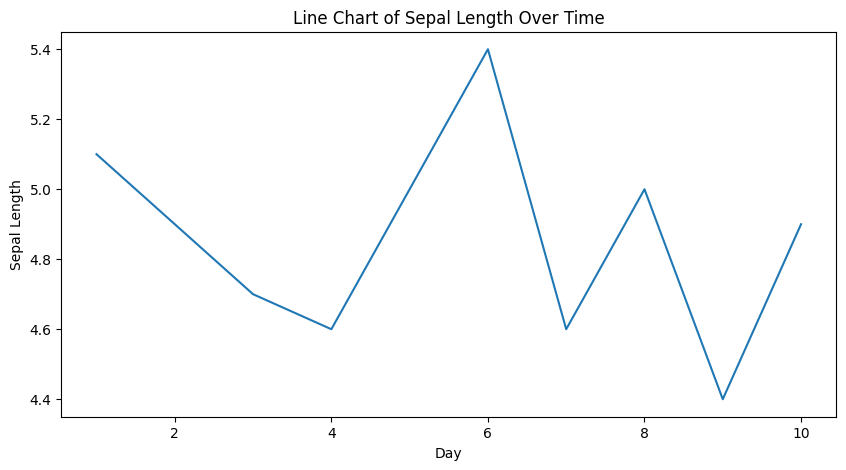

In [64]:
# Simulating data over time
time_data = pd.DataFrame({
    'day': range(1, 11),
    'sepal_length': df['sepal_length'][:10]
})

# Line Chart
plt.figure(figsize=(10, 5))
sns.lineplot(x='day', y='sepal_length', data=time_data)
plt.title('Line Chart of Sepal Length Over Time')
plt.xlabel('Day')
plt.ylabel('Sepal Length')
plt.show()


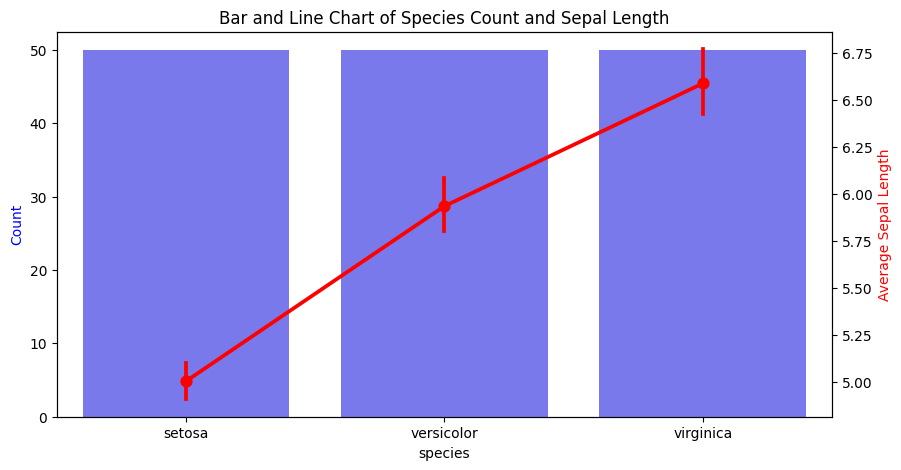

In [65]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for count of species
sns.countplot(x='species', data=df, ax=ax1, alpha=0.6, color='b')
ax1.set_ylabel('Count', color='b')

# Line chart for average sepal length of species
ax2 = ax1.twinx()
sns.pointplot(x='species', y='sepal_length', data=df, ax=ax2, color='r', markers='o', linestyles='-')
ax2.set_ylabel('Average Sepal Length', color='r')
plt.title('Bar and Line Chart of Species Count and Sepal Length')
plt.show()


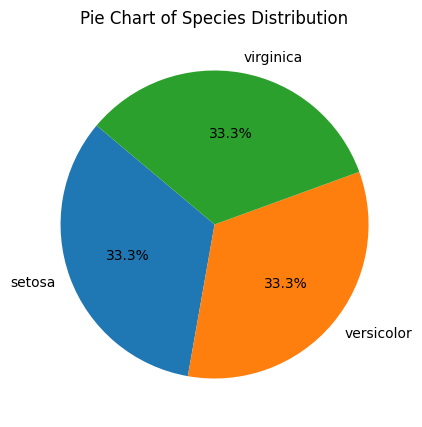

In [68]:
# Pie Chart
species_count = df['species'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(species_count, labels=species_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Species Distribution')
plt.show()

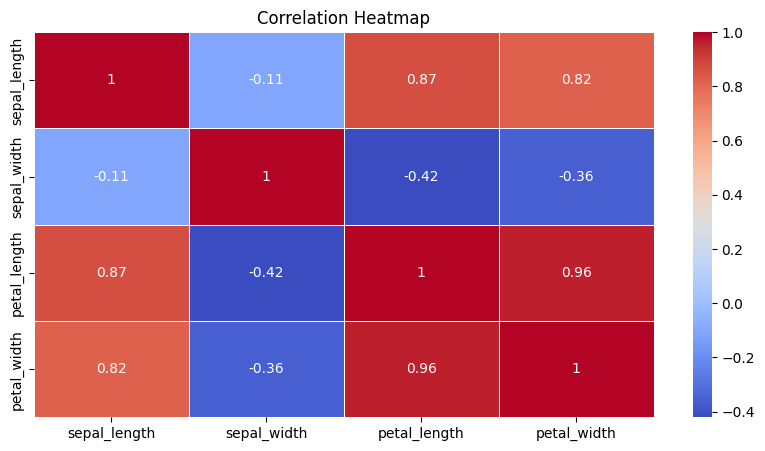

In [70]:
# Heatmap
df = df.drop(['species'], axis=1)
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

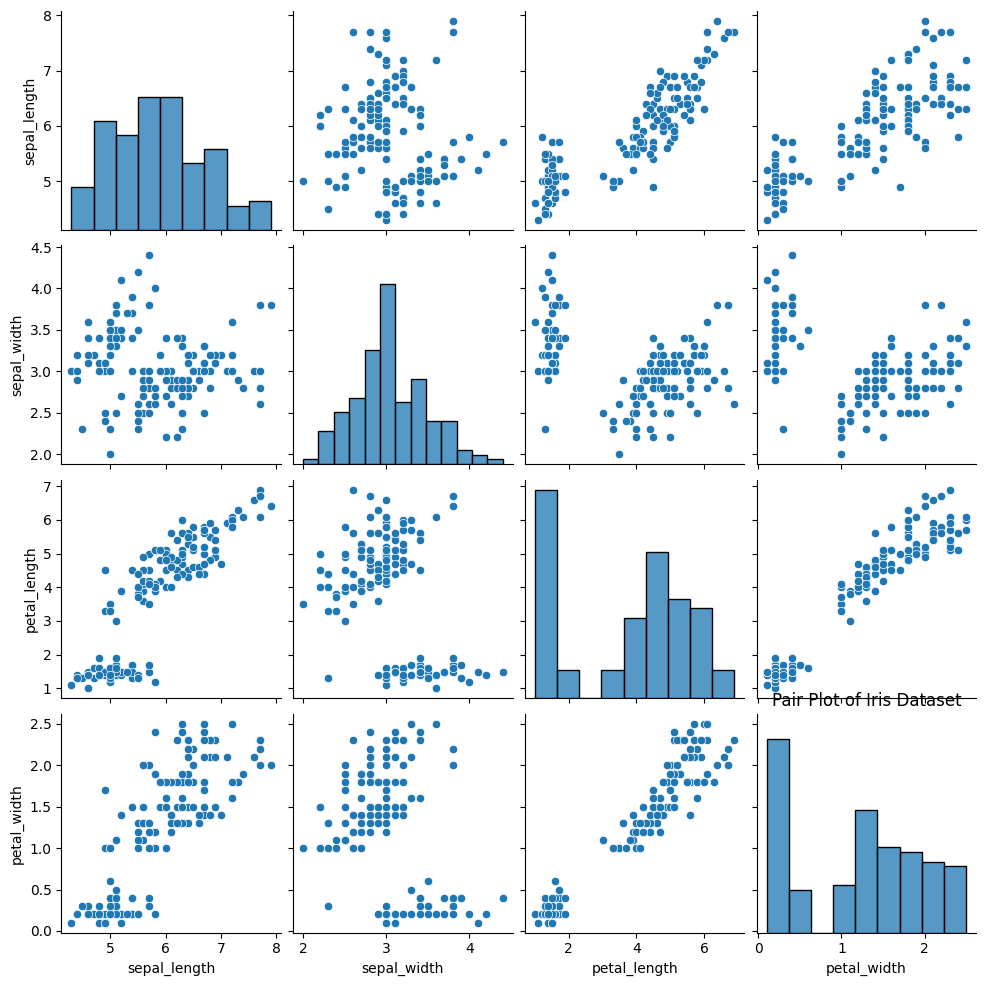

In [71]:
df = pd.read_csv('iris_data.csv')
# Pair Plot
sns.pairplot(df)
plt.title('Pair Plot of Iris Dataset')
plt.show()


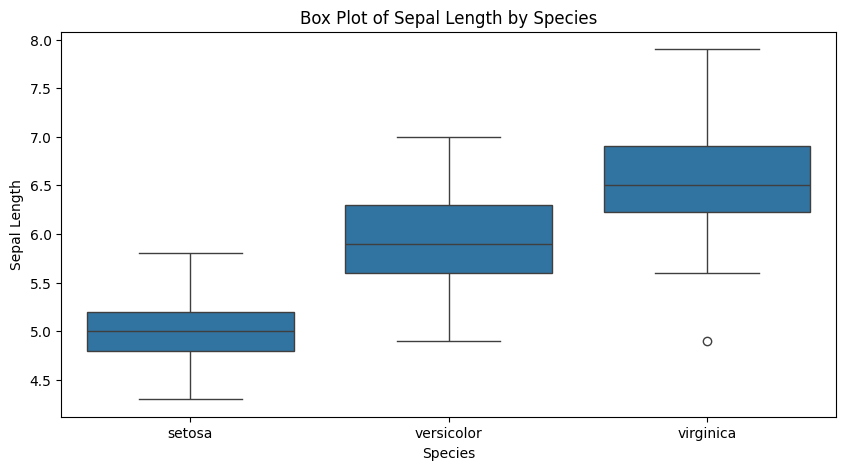

In [72]:
# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Box Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()


# **12/11/2024**

In [7]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)
print(len(sw_nltk))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
text = "When I first met her she was very quiet. She remained quiet during the entire two hour long journey from Stony Brook to New York." 
words = [word for word in text.split() if word.lower() not in sw_nltk]
#print(words)
new_text = " ".join(words)
print(new_text)
print("Old length: ", len(text))
print("New length: ", len(new_text))


first met quiet. remained quiet entire two hour long journey Stony Brook New York.
Old length:  129
New length:  82


# **19/11/2024**

# Bagging Implementation

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [5]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Initialize KNN
knn = KNeighborsClassifier()
# Initialize BaggingClassifier with KNN as base estimator
bagging = BaggingClassifier(estimator=knn, n_estimators=10, random_state=42)
# Train BaggingClassifier
bagging.fit(X_train, y_train)
# Predict on test data
y_pred = bagging.predict(X_test)
# Evaluate accuracy
print(f'Bagging KNN Accuracy: {accuracy_score(y_test, y_pred)}')


Bagging KNN Accuracy: 1.0


# Boosting Implimentation

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load Titanic dataset
data = pd.read_csv('titanic.csv')

In [10]:
# Simple preprocessing to remove missing values
data = data.dropna(subset=['Age', 'Embarked'])
# Select features and target variable
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [11]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Train an AdaBoost Classifier:
#- Using a Decision Tree as the base classifier.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Initialize Decision Tree
tree = DecisionTreeClassifier(max_depth=1, random_state=42)
# Initialize AdaBoostClassifier with Decision Tree as base estimator
adaboost = AdaBoostClassifier(estimator=tree, n_estimators=50, random_state=42)
# Train AdaBoostClassifier
adaboost.fit(X_train, y_train)
# Predict on test data
y_pred = adaboost.predict(X_test)
   # Evaluate accuracy
print(f'Boosting Accuracy: {accuracy_score(y_test, y_pred)}')


Boosting Accuracy: 0.6573426573426573


C:\Users\junai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
